In [1]:
# import general packages, check folders
#%reset
import os
import numpy as np
import h5py
import pandas as pd
#import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
from pathlib import Path

# TO DO - REMOVE THE UNNECESSARY LIBRARY IMPORTS

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [2]:
# setting default fontsizes for plots

s=16 # CHANGE FONTSIZE HERE

plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'


In [3]:
# load behavioral data - coded 1 for "social", 0 for "nonsocial" and 9 for "unsure", nan for missed response
responses = np.load(os.path.join(data_file_loc,'responses.npy'))
responses.shape # subs *movies

(1048, 10)

In [4]:
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical","Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]
vidnames

['COAXING-B',
 'BILLIARD-A',
 'DRIFTING-A',
 'Fishing',
 'Random mechanical',
 'Scaring',
 'SEDUCING-B',
 'STAR-A',
 'SURPRISING-B',
 'TENNIS-A']

In [5]:
coef_slope_rand = np.load(os.path.join(data_file_loc,'coefs_run_norm','slope_reg','coef_slopereg_runnorm_Random mechanical.npy'))
coef_slope_fish = np.load(os.path.join(data_file_loc,'coefs_run_norm','slope_reg','coef_slopereg_runnorm_Fishing.npy'))
coef_slope_coax = np.load(os.path.join(data_file_loc,'coefs_trial_norm','slope_reg','coef_slopereg_trialnorm_COAXING-B.npy'))
coef_slope_bill = np.load(os.path.join(data_file_loc,'coefs_trial_norm','slope_reg','coef_slopereg_trialnorm_BILLIARD-A.npy'))
coef_slope_all  = np.load(os.path.join(data_file_loc,'coef_slopereg_all.npy'))

print(coef_slope_rand.shape)
coef_slope_all.shape

(1048, 268)


(1048, 268, 2)

# statistics

In [6]:
#from mne.stats import fdr_correction
from multipy.fdr import lsu
#from multipy.data import neuhaus

#pvals = neuhaus()
#significant_pvals = lsu(pvals, q=0.05)
#print(zip(['{:.4f}'.format(p) for p in pvals], significant_pvals))


### rand

In [7]:
# same movie: rand

movie_ind = 4

soc_inds = responses[:,movie_ind]==1 # subs who responded "social"
nonsoc_inds = responses[:,movie_ind]==0 # subs who respoded "nonsocial"

print(f'movie={vidnames[movie_ind]},soc={len(np.where(soc_inds)[0])},nonsocial={len(np.where(nonsoc_inds)[0])}')

# ttest between slope regs yes vs. no
_,pval_slope_rand_unc = stats.ttest_ind(coef_slope_rand[soc_inds,:], coef_slope_rand[nonsoc_inds,:],axis=0, equal_var=False)
meanDiff_sl_rand = np.nanmean(coef_slope_rand[soc_inds,:],axis=0)-np.nanmean(coef_slope_rand[nonsoc_inds,:],axis=0)

#fdr correction
pval_slope_rand_corr = lsu(pval_slope_rand_unc,q=.05)#fdr_correction(pval_slope_rand,.05)
#_,pval_slope_rand = fdr_correction(pval_slope_rand,.05)
#pval_slope_rand
pval_slope_rand_unc = pval_slope_rand_unc<.05



movie=Random mechanical,soc=88,nonsocial=587


### fish

In [8]:
# same movie: fish

movie_ind = 3

soc_inds = responses[:,movie_ind]==1 # subs who responded "social"
nonsoc_inds = responses[:,movie_ind]==0 # subs who respoded "nonsocial"

print(f'movie={vidnames[movie_ind]},soc={len(np.where(soc_inds)[0])},nonsocial={len(np.where(nonsoc_inds)[0])}')

# ttest between slope regs yes vs. no
_,pval_slope_fish_unc = stats.ttest_ind(coef_slope_fish[soc_inds,:], coef_slope_fish[nonsoc_inds,:],axis=0, equal_var=False)
meanDiff_sl_fish = np.nanmean(coef_slope_fish[soc_inds,:],axis=0)-np.nanmean(coef_slope_fish[nonsoc_inds,:],axis=0)

#fdr correction
#_,pval_slope_fish = fdr_correction(pval_slope_fish,.05)
pval_slope_fish_corr = lsu(pval_slope_fish_unc,q=.05)
pval_slope_fish_unc = pval_slope_fish_unc < .05



movie=Fishing,soc=757,nonsocial=108


### COAX/BILL

In [9]:
# coax vs bill
movie_inds = [0,1]

print([vidnames[i] for i in movie_inds])

subs = (responses[:,movie_inds[0]]==1) & (responses[:,movie_inds[1]]==0) # subs who respoded "nonsocial" to BILL and "social" to COAX

print(f'Nr. Soc and Nr. nonsoc ={len(np.where(subs)[0])}')

_,pval_slope_coaxbill_unc = stats.ttest_rel(coef_slope_coax[subs,:], coef_slope_bill[subs,:],axis=0)
meanDiff_sl_coaxbill = np.nanmean(coef_slope_coax[subs,:]-coef_slope_bill[subs,:],axis=0)

#fdr correction
#_,pval_slope_coaxbill = fdr_correction(pval_slope_coaxbill,.05)
pval_slope_coaxbill_corr = lsu(pval_slope_coaxbill_unc,q=.05)
#pval_slope_coaxbill
pval_slope_coaxbill_unc = pval_slope_coaxbill_unc<.05


['COAXING-B', 'BILLIARD-A']
Nr. Soc and Nr. nonsoc =870


### all movies

In [10]:
# to get an estimate for how many subjects gave all 10 responses. In the data, subjects with <10 responaes have already been assigned an NaN value (so no need to select only good subjects again.)
count_resp = np.zeros((responses.shape[0],))
for i in range(responses.shape[0]):
    count_resp[i] = len(np.where(~np.isnan(responses[i,:]))[0])
len(np.where(count_resp == 10)[0])

814

In [11]:
pval_slope_all_unc = np.empty((268,))
meanDiff_sl_all =  np.empty_like(pval_slope_all_unc)
pval_slope_all_unc[:] = np.nan
meanDiff_sl_all[:] = np.nan

for n in range(268):
    #_,pval_slope_all[n] = stats.ttest_1samp(np.ndarray.flatten(coef_slope_all[:,n,:]),0,nan_policy='omit')
    dat = np.mean(coef_slope_all[:,n,:],axis=1)
    dat = dat[~np.isnan(dat)] # nan values are usually incomplete subjects (it's set that way in 2A_1_A_..allmovies.ipynb)
    _,pval_slope_all_unc[n] = stats.ttest_1samp(dat,0,nan_policy='omit')
    meanDiff_sl_all[n] = np.nanmean(dat)
#_,pval_slope_all = fdr_correction(pval_slope_all)
pval_slope_all_corr = lsu(pval_slope_all_unc,q=.05)
pval_slope_all_unc = pval_slope_all_unc < .05

#pval_slope_all

In [12]:
nodes_coaxbill_rand_all = (pval_slope_rand_corr) & (pval_slope_coaxbill_corr)  & (pval_slope_all_corr) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_fish)) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_coaxbill)) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_all))
np.save(os.path.join(data_file_loc,'nodes_coaxbill_rand_all.npy'),nodes_coaxbill_rand_all)
len(np.where(nodes_coaxbill_rand_all)[0])


74

In [13]:
# don't use this!
nodes_coaxbill_rand_all_fish = (pval_slope_rand_corr) & (pval_slope_coaxbill_corr)  & (pval_slope_all_corr) & (pval_slope_fish_corr) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_fish)) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_coaxbill)) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_all))
len(np.where(nodes_coaxbill_rand_all_fish)[0])

1

- only one significant nodes including Fishing. Makes more sense to skip it since fishing has anyway hardly any significant nodes

In [14]:
# are all these nodes with beta soc >beta nonsoc activations or deactivations? let's check

dirn_rand = np.empty((268,))
for n in range(268):
    if np.abs(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) > np.abs(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0)):
        dirn_rand[n] = 1
    elif np.abs(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) < np.abs(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0)):
        dirn_rand[n] = -1
    else:
        dirn_rand[n] = 0

dirn_fish = np.empty((268,))
count=0
for n in range(268):
    if np.abs(np.nanmean(coef_slope_fish[soc_inds,n],axis=0)) > np.abs(np.nanmean(coef_slope_fish[nonsoc_inds,n],axis=0)):
        dirn_fish[n] = 1
    elif np.abs(np.nanmean(coef_slope_fish[soc_inds,n],axis=0)) < np.abs(np.nanmean(coef_slope_fish[nonsoc_inds,n],axis=0)):
        dirn_fish[n] = -1
    else:
        dirn_fish[n] = 0
dirn_coaxbill = np.empty((268,))
count=0
for n in range(268):
    if np.abs(np.nanmean(coef_slope_coax[subs,n],axis=0)) > np.abs(np.nanmean(coef_slope_bill[subs,n],axis=0)):
        dirn_coaxbill[n] = 1
    elif np.abs(np.nanmean(coef_slope_coax[subs,n],axis=0)) < np.abs(np.nanmean(coef_slope_bill[subs,n],axis=0)):
        dirn_coaxbill[n] = -1
    else:
        dirn_coaxbill[n] = 0


print('rand: absyes > absno:',len(np.where(dirn_rand[nodes_coaxbill_rand_all] == 1)[0]),', absno > absyes:',len(np.where(dirn_rand[nodes_coaxbill_rand_all] == -1)[0]))
print('fish: absyes > absno:', len(np.where(dirn_fish[nodes_coaxbill_rand_all] == 1)[0]),'abs no > abs yes:',len(np.where(dirn_fish[nodes_coaxbill_rand_all] == -1)[0]))
print('coaxbill: absyes>absno:', len(np.where(dirn_coaxbill[nodes_coaxbill_rand_all] == 1)[0]),', absno > absyes:', len(np.where(dirn_coaxbill[nodes_coaxbill_rand_all] == -1)[0])) 

rand: absyes > absno: 67 , absno > absyes: 7
fish: absyes > absno: 73 abs no > abs yes: 1
coaxbill: absyes>absno: 73 , absno > absyes: 1


- couple of deactivations in some of the nodes, but mostly activations. for RAND: 7 nodes with smaller slopes (maybe deactivations?) for "social" but in the  other 2 cases, only 1 deactivation each.

# Plot figs

### Exploratory: is the mean diff > 0 due to positive or negative differences?

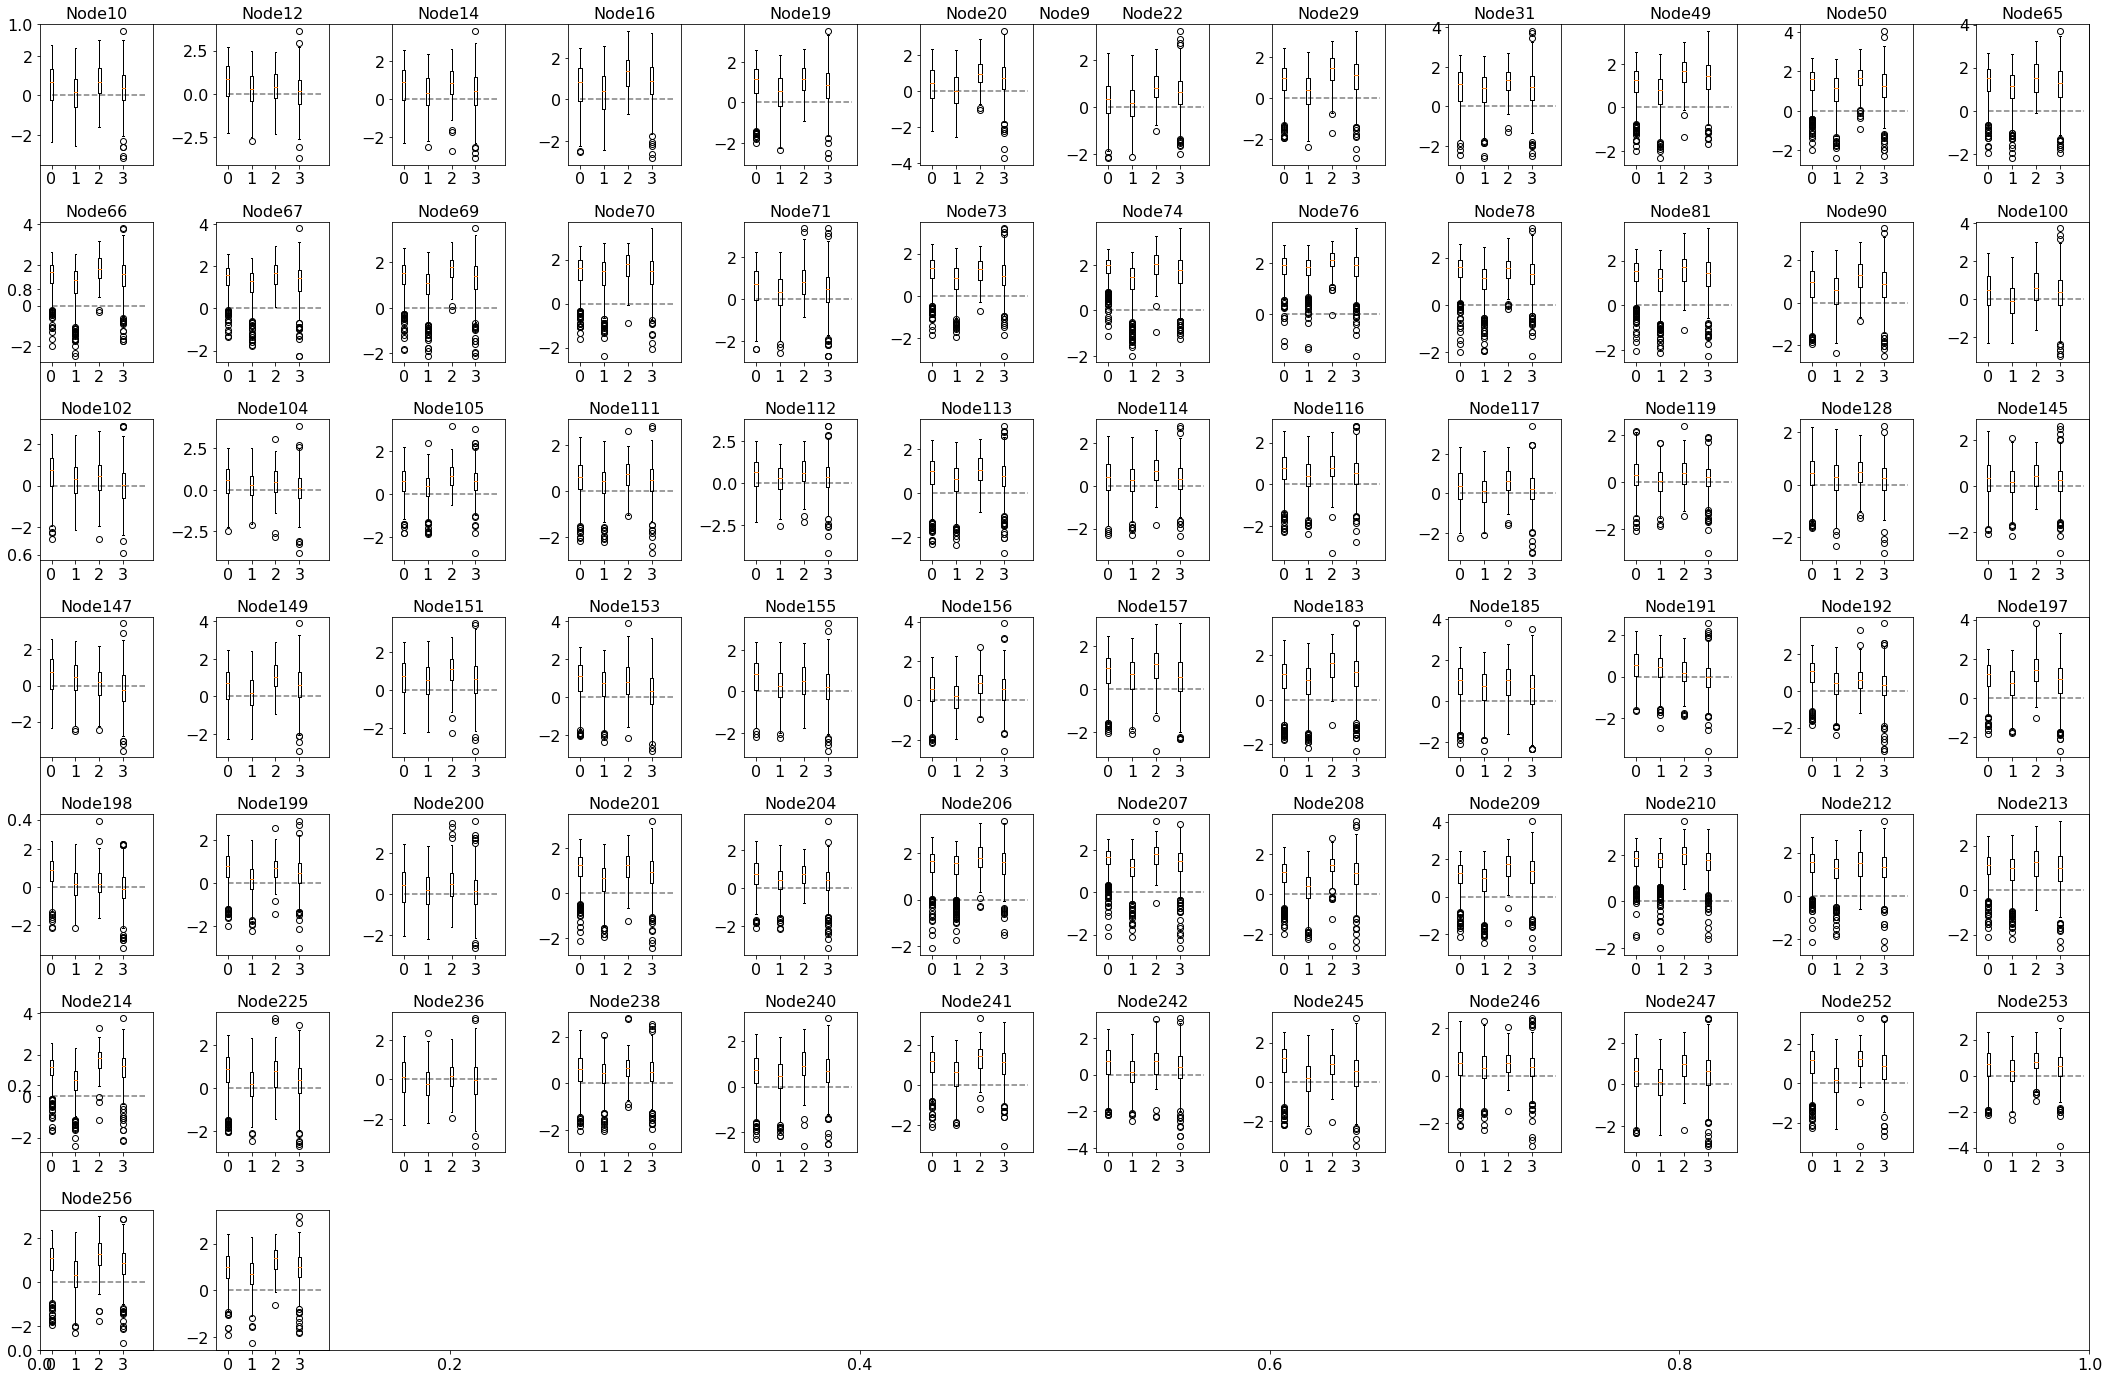

In [15]:
fig = plt.figure(1,figsize=(30,20))

for i,n in enumerate(np.where(nodes_coaxbill_rand_all)[0]):
    plt.title(f'Node{n+1}')
    ax = fig.add_subplot(7,12,i+1)
    plt.boxplot(coef_slope_coax[subs,n],positions=[0])
    plt.boxplot(coef_slope_bill[subs,n],positions=[1])
    plt.boxplot(coef_slope_rand[responses[:,4]==1,n],positions=[2])
    plt.boxplot(coef_slope_rand[responses[:,4]==0,n],positions=[3])
    plt.hlines(0,0,4,color = 'grey',ls='dashed')
plt.tight_layout()

- looks like all are positive reg coeffts, i.e., positive activations
- In the notebook Plot_movie_timecourses.ipynb, we can also double-check this with some timecourse plots for (1) All movies, and (2) Random Mech


## Plot other figures


In [16]:
fig_save_loc = os.path.join('/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig3_glm_soc_vs_nonsoc/')

In [17]:
print('all arrays dividided by their std:')
print(f'RAND: min {min(meanDiff_sl_rand/np.std(meanDiff_sl_rand)):.2f}, max {max(meanDiff_sl_rand/np.std(meanDiff_sl_rand)):.2f}')
print(f'COAX-BILL:, min {min(meanDiff_sl_coaxbill/np.std(meanDiff_sl_coaxbill)):.2f}, max {max(meanDiff_sl_coaxbill/np.std(meanDiff_sl_coaxbill)):.2f}')
print(f'FISHING: min {min(meanDiff_sl_fish/np.std(meanDiff_sl_fish)) :.2f}, max {max(meanDiff_sl_fish/np.std(meanDiff_sl_fish)):.2f}')
print(f'ALL MOVIES:, min {min(meanDiff_sl_all/np.std(meanDiff_sl_all))}, max {max(meanDiff_sl_all/np.std(meanDiff_sl_all)):.2f}')

all arrays dividided by their std:
RAND: min -1.46, max 3.67
COAX-BILL:, min -1.99, max 4.39
FISHING: min -1.90, max 3.75
ALL MOVIES:, min -0.9675308050916698, max 3.51


In [18]:
print('based on raw values of two comparable analyses:')
print(f'RAND: min {min(meanDiff_sl_rand):.2f}, max {max(meanDiff_sl_rand):.2f}')
print(f'FISHING: min {min(meanDiff_sl_fish) :.2f}, max {max(meanDiff_sl_fish):.2f}')


based on raw values of two comparable analyses:
RAND: min -0.22, max 0.55
FISHING: min -0.18, max 0.35


- hence for scatterplots, min = -2, max = 4.5 in the function below.
- for the brain maps of rand and fish, we need actual un-normalized values: -.22,.55


In [19]:
def plot_fig(X,Y,xlabel,ylabel):
    #X = stats.zscore(X)
    X = X/np.nanstd(X)
    #Y = stats.zscore(Y)
    Y = Y/np.nanstd(Y)
    plt.plot(X,Y,ls='None',marker='.',alpha = .5,color='grey',label = 'mean "social"-"nonsocial"\nper node',markersize=8)
    r,p = stats.pearsonr(X,Y)
    
    plt.xlabel(xlabel+'/std')
    plt.ylabel(ylabel+'/std')
    
    #xmin,xmax = plt.xlim()
    #ymin,ymax = plt.ylim()
    #xymin = min(xmin,ymin)
    #xymax = max(xmax,ymax)
    
    xymin,xymax =  -2.5,4.5
    
    
    # best_fit_line(X,Y):
    m, b = np.polyfit(X,Y, 1)
    print(np.poly1d([m,b]))
    xplot = np.linspace(xymin,xymax,10)
    plt.plot(xplot, m*xplot + b,ls='dashed',color = 'k',label = 'line of \nbest fit\n(all nodes)') #plt.title(np.poly1d([m,b]))

    plt.xlim(xymin,xymax)
    plt.ylim(xymin,xymax)
    xpos = xymin#+ .01*(xmax-xmin)
    ypos = xymin+ .8*(xymax-xymin)
    plt.text(xpos,ypos,f'r={r:.2f},\np={p:.1e}',fontsize=20)

    #plt.text(xymin,.7*xymax,f'sl.={m:.2f},\nint.={b:.2f}')
    plt.vlines(0,xymin,xymax,color = 'grey',ls = 'dashed',alpha = .4)
    plt.hlines(0,xymin,xymax,color = 'grey',ls = 'dashed',alpha = .4)
   

def plot_sig_nodes(X,Y,inds):
    #X = stats.zscore(X)
    X = X/np.nanstd(X)
    #Y = stats.zscore(Y)
    Y = Y/np.nanstd(Y)
    plt.plot(X[inds],Y[inds],ls='None',marker='o',mfc='w', mec='k',label = 'pair-wise sig.',ms=8)
    plt.plot(X[nodes_coaxbill_rand_all],Y[nodes_coaxbill_rand_all],ls='None',marker='o',
    mfc='k', mec='k',mew = 3, linewidth = 5,label = 'sig. across all\ncomparisons\nexcept FISH',ms=4)
    #plt.plot(X[nodes_coaxbill_rand_all_fish],Y[nodes_coaxbill_rand_all_fish],ls='None',marker='D',
    #mfc='g', mec='g',label = 'sig. across all\ncomparisons',ms=10)
    

 
0.2725 x + 0.6212
(-2.5, 4.5)
 
0.3868 x + 0.08426
 
0.1618 x + 0.3936
 
0.4171 x + 0.221
 
0.293 x + 0.4423
 
0.548 x + 0.4201


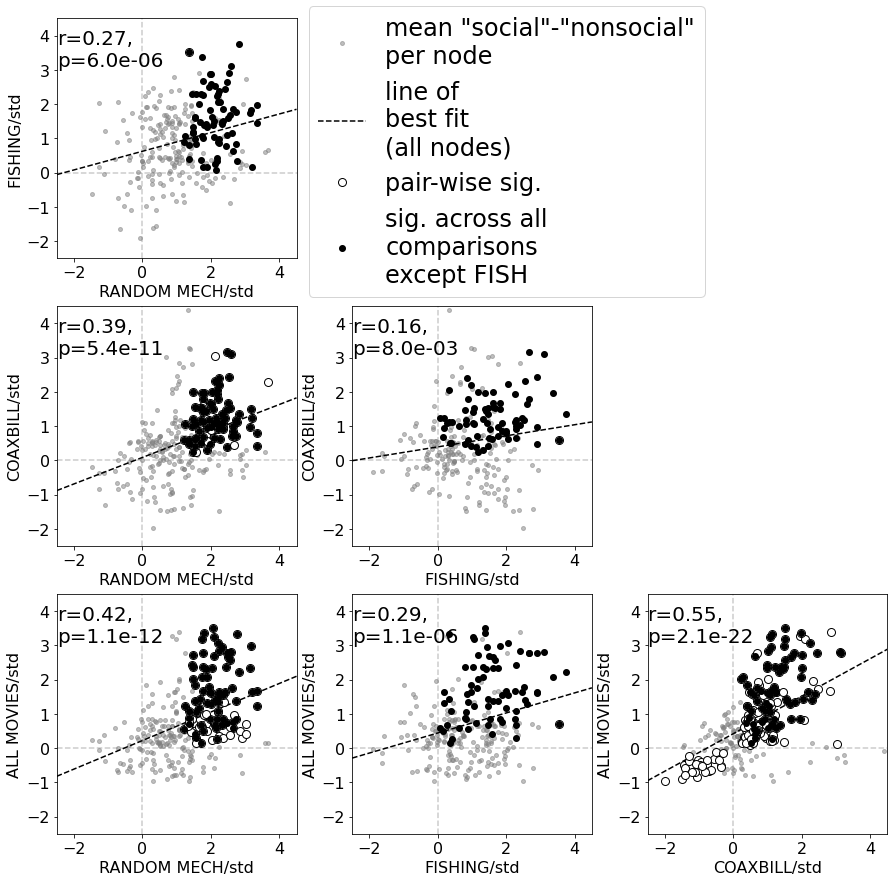

In [20]:
dims = [15,15]
fig= plt.figure(1,figsize = dims)

div = [.05,.38,.71]
w,h = .3,.3

#plt.suptitle('Mean differences: "Social" - "Nonsocial"',fontweight='bold')
ax = fig.add_subplot(331)
#ax.set_position([div[0],div[2],w,h]) 
#plt.subplot(331)
#plt.subplot(445)
X,Y = meanDiff_sl_rand,meanDiff_sl_fish
plot_fig(X,Y,'RANDOM MECH','FISHING')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_rand_corr) & (pval_slope_fish_corr) & (np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_fish)) 
plot_sig_nodes(X,Y,inds)
plt.legend(bbox_to_anchor = (1,1.1),fontsize =24)
print(plt.xlim())

ax = fig.add_subplot(334)
#ax.set_position([div[0],div[1],w,h]) 
X,Y = meanDiff_sl_rand,meanDiff_sl_coaxbill
plot_fig(X,Y,'RANDOM MECH','COAXBILL')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_rand_corr) & (pval_slope_coaxbill_corr) & (np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_coaxbill)) 
plot_sig_nodes(X,Y,inds)


ax = fig.add_subplot(3,3,5)
#ax.set_position([div[1],div[1],w,h]) 
#plt.subplot(4,4,10)
X,Y = meanDiff_sl_fish,meanDiff_sl_coaxbill
plot_fig(X,Y,'FISHING','COAXBILL')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_fish_corr) & (pval_slope_coaxbill_corr) & (np.sign(meanDiff_sl_fish) == np.sign(meanDiff_sl_coaxbill)) 
plot_sig_nodes(X,Y,inds)


ax = fig.add_subplot(3,3,7)
#ax.set_position([div[0],div[0],w,h]) 
X,Y = meanDiff_sl_rand,meanDiff_sl_all
plot_fig(X,Y,'RANDOM MECH','ALL MOVIES')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_rand_corr) & (pval_slope_all_corr) & (np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_all)) 
plot_sig_nodes(X,Y,inds)


ax = fig.add_subplot(3,3,8)
#ax.set_position([div[1],div[0],w,h]) 
#plt.subplot(4,4,14)
X,Y = meanDiff_sl_fish,meanDiff_sl_all
plot_fig(X,Y,'FISHING','ALL MOVIES')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_fish_corr) & (pval_slope_all_corr) & (np.sign(meanDiff_sl_fish) == np.sign(meanDiff_sl_all)) 
plot_sig_nodes(X,Y,inds)


ax = fig.add_subplot(3,3,9)
#ax.set_position([div[2],div[0],w,h]) 
#plt.subplot(4,4,15)
X,Y = meanDiff_sl_coaxbill,meanDiff_sl_all
plot_fig(X,Y,'COAXBILL','ALL MOVIES')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_coaxbill_corr) & (pval_slope_all_corr) & (np.sign(meanDiff_sl_coaxbill) == np.sign(meanDiff_sl_all)) 
plot_sig_nodes(X,Y,inds)

plt.savefig(os.path.join(fig_save_loc,'fig2S_scatterplot.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


#plt.tight_layout()

## Plot brainmaps

In [21]:
#import plotting functions

from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import plot_glass_brain
import nibabel as nib
from nilearn.plotting import plot_stat_map

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)


lbl = [str.upper(x[0:4]) for x in vidnames]
#lbl

In [22]:
shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
shen268_lbl

,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
0,"{'coords': [14.083200000000005, 56.6944, -16.6...","{'coords': [9.599999999999994, 17.618823529411...","{'coords': [5.270633397312864, 35.032629558541...","{'coords': [15.647840531561457, 34.18604651162...","{'coords': [8.283887468030684, 46.058823529411...","{'coords': [14.581460674157299, 64.75280898876...","{'coords': [30.41914191419142, 54.795379537953...","{'coords': [44.469325153374236, 46.09509202453...","{'coords': [28.814814814814817, 51.16316316316...","{'coords': [8.521081081081078, 53.28, 23.88540...",...,"{'coords': [-10.399527186761233, 10.8770685579...","{'coords': [-14.491582491582491, -3.5488215488...","{'coords': [-24.77079107505071, 5.537525354969...","{'coords': [-9.427230046948353, -25.5399061032...","{'coords': [-4.68474576271187, -10.24067796610...","{'coords': [-11.407792207792212, -25.563636363...","{'coords': [-4.821052631578951, -21.5115789473...","{'coords': [-4.227272727272734, -37.8977272727...","{'coords': [-6.9375, -33.13068181818181, -39.3...","{'coords': [-5.697885196374628, -18.9667673716..."


In [23]:
rois = [eval(shen268_lbl[str(n+1)][0])['name'] for n in np.where(nodes_coaxbill_rand_all)[0]]
for i,roi in enumerate(rois):
    print(np.where(nodes_coaxbill_rand_all)[0][i],roi)
print(f'{len(rois)} ROIs sig. at p-value threshold .05\n')

8 100.00% Frontal_Pole
9 48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus
11 56.57% Superior_Frontal_Gyrus; 41.14% Frontal_Pole
13 98.80% Middle_Frontal_Gyrus
15 42.87% Inferior_Frontal_Gyrus_pars_triangularis; 25.98% Inferior_Frontal_Gyrus_pars_opercularis; 12.25% Frontal_Orbital_Cortex; 10.24% Frontal_Pole; 6.02% Frontal_Operculum_Cortex
18 56.48% Frontal_Pole; 27.04% Inferior_Frontal_Gyrus_pars_triangularis; 14.09% Middle_Frontal_Gyrus
19 43.55% Frontal_Operculum_Cortex; 33.40% Insular_Cortex; 10.36% Inferior_Frontal_Gyrus_pars_triangularis; 6.98% Frontal_Orbital_Cortex; 5.71% Inferior_Frontal_Gyrus_pars_opercularis
21 76.55% Middle_Frontal_Gyrus; 21.03% Inferior_Frontal_Gyrus_pars_opercularis
28 80.29% Superior_Frontal_Gyrus; 18.49% Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex)
30 75.69% Precentral_Gyrus; 20.60% Middle_Frontal_Gyrus
48 100.00% Lateral_Occipital_Cortex_superior_division
49 35.64% Angular_Gyrus; 25.13% Middle_Tempor

In [24]:
def color_rois(values):
    
    """
    This function assumes you are passing a vector "values" with the same length as the number of nodes in the atlas.
    """
    shen268 = nib.load(os.path.join(data_file_loc,"shen_2mm_268_parcellation.nii.gz"))
    shen268_data = shen268.get_fdata()
    img = np.zeros(shen268_data.shape)
    #print(shen268_data.shape)
    for roi in range(len(values)):
        itemindex = np.where(shen268_data==roi+1) # find voxels in this node (add 1 to account for zero-indexing)
        #print(len(itemindex[0]))
        img[itemindex] = values[roi] # color them by the desired value 

    affine = shen268.affine
    img_nii = nib.Nifti1Image(img, affine)
    
    return img_nii

In [25]:
cols = ['k','grey','g']
lw = [3,2,1]

In [26]:
len(np.where(pval_slope_rand_unc)[0])

138

In [27]:
from nilearn.surface import vol_to_surf
from nilearn.plotting import plot_glass_brain, plot_surf_roi,plot_stat_map,plot_img,plot_surf_contours
from nilearn import datasets
bg_img = datasets.load_mni152_template()
from nilearn.datasets import fetch_surf_fsaverage
fsaverage = fetch_surf_fsaverage()


#coords = [10*int(i) for i in np.linspace(-4,

In [32]:
regions_dict

{b'G_postcentral': 'Postcentral gyrus', b'G_precentral': 'Precentral gyrus'}

In [46]:
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
parcellation = destrieux_atlas['map_right']
np.unique(parcellation).shape

(75,)

In [41]:
# these are the regions we want to outline
regions_dict = {b'G_postcentral': 'Postcentral gyrus',
                b'G_precentral': 'Precentral gyrus'}

# get indices in atlas for these labels
regions_indices = [np.where(np.array(destrieux_atlas['labels']) == region)[0][0]
                   for region in regions_dict]
regions_indices

[28, 29]

In [56]:
view_surf(fsaverage.infl_left, texture,  bg_map=fsaverage.sulc_left)

TypeError: 'Figure' object is not callable

In [60]:
fig_save_loc

'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig3_glm_soc_vs_nonsoc/'

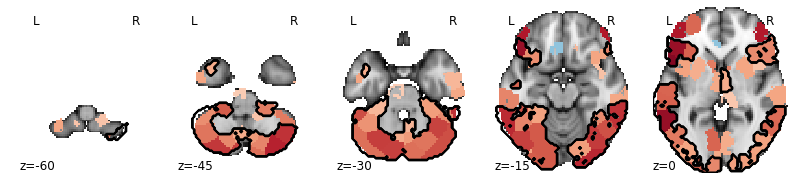

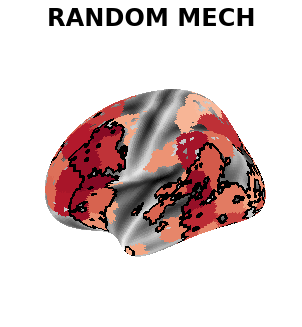

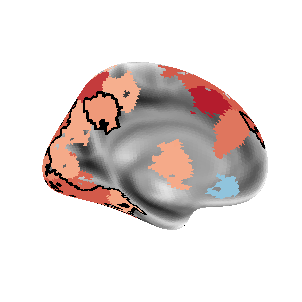

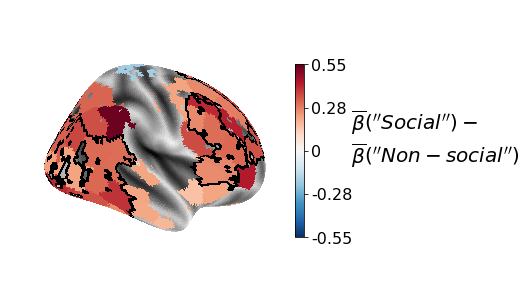

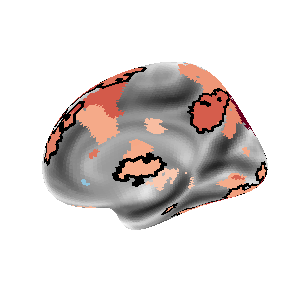

In [92]:
vmin,vmax = -.55,.55
cmap = 'RdBu_r'
#txt = r' $\overline{\beta}(\""")-$' + '\n' + r'$\overline{\beta}_{Non-social}$'+ '\n'
title_txt = 'RANDOM MECH'
txt = '  'r"$\overline{\beta}{(''Social'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non-social'')}$"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)

nodes = np.zeros((268,))
nodes[pval_slope_rand_unc] = meanDiff_sl_rand[pval_slope_rand_unc]

img = roi_to_brain(pd.Series(nodes), mask_x)
#coords = [-50,-40,-30,-20,-10,0,10,25,40,50,60] # initial exploration
coords = [-60,-45,-30,-15,0] # initial exploration
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
#ax_plot.title(title_txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot._colorbar_ax.text(1,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
plt.savefig(os.path.join(fig_save_loc,f'RAND/axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#LH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_left)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot1.axes[1].text(4,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
surf_plot1.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_left, texture_contour, figure=surf_plot1, legend=True,levels = [1], colors=['k'])
plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_left_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_left, view = 'medial')#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot2.axes[1].text(4,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#surf_plot2.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
plot_surf_contours(fsaverage.infl_left, texture_contour, figure=surf_plot2, legend=True,levels = [1], colors=['k'])
plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_left_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#RH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
surf_plot3=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot3.axes[1].text(4,.8*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#surf_plot3.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_right, texture_contour, figure=surf_plot3, legend=True,levels = [1], colors=['k'])
surf_plot3.axes[1].text(5,.5*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_right_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

surf_plot4=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=False,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right, view ='medial')#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot4.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
plot_surf_contours(fsaverage.infl_right, texture_contour, figure=surf_plot4, legend=True, levels = [1], colors=['k'])#, labels=['Sig. (q<.05) across\n(a),(c),(d)'])
plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_right_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


In [20]:
# glass/axplots
'''
vmax = .55
#txt = r' $\overline{\beta}(\""")-$' + '\n' + r'$\overline{\beta}_{Non-social}$'+ '\n'
txt = r"$\overline{\beta}{(''Social'')}-$" + '\n' + r"$\overline{\beta}{(''Non-social'')}$"

#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)

nodes = np.zeros((268,))
nodes[pval_slope_rand_unc] = meanDiff_sl_rand[pval_slope_rand_unc]

img = roi_to_brain(pd.Series(nodes), mask_x)
fig=plt.figure(1,figsize=((10,3)))
glassb = plot_glass_brain(img.to_nifti(), symmetric_cbar = True,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True,vmax=vmax)
glassb.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0.2,txt,fontsize=24,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
#glassb.text(0,1,'x')
#glassb.annotate(scalebar=True)
#glassb.add_contours(color_rois(pval_slope_rand),linewidths=lw[1], colors=[cols[1]],linestyles='dotted')
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
#glassb.add_contours(color_rois(nodes_coaxbill_rand_all_fish),linewidths=lw[2], colors=[cols[2]],filled=True,linestyle='dashed')
#cbar = plt.colorbar(glassb)
#cbar.set_label('# of contacts', rotation=270)
#glassb.savefig(os.path.join(fig_save_loc,'RAND.png'),dpi=300)
plt.savefig(os.path.join(fig_save_loc,'RAND.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')

nodes = np.zeros((268,))
nodes[nodes_coaxbill_rand_all] = meanDiff_sl_rand[nodes_coaxbill_rand_all]
img = roi_to_brain(pd.Series(nodes), mask_x)
ax_map = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=10*np.arange(-4,7,2), cmap = 'RdBu_r',vmax=vmax,colorbar=False,annotate=True)
#ax_map.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'RAND_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')

'''

'\nvmax = .55\n#txt = r\' $\\overline{\x08eta}(""")-$\' + \'\n\' + r\'$\\overline{\x08eta}_{Non-social}$\'+ \'\n\'\ntxt = r"$\\overline{\x08eta}{(\'\'Social\'\')}-$" + \'\n\' + r"$\\overline{\x08eta}{(\'\'Non-social\'\')}$"\n\n#img.plot(colorbar=True, title = txt,cmap = \'RdBu_r\',symmetric_cbar = False)\n\nnodes = np.zeros((268,))\nnodes[pval_slope_rand_unc] = meanDiff_sl_rand[pval_slope_rand_unc]\n\nimg = roi_to_brain(pd.Series(nodes), mask_x)\nfig=plt.figure(1,figsize=((10,3)))\nglassb = plot_glass_brain(img.to_nifti(), symmetric_cbar = True,\n                display_mode=\'lyrz\', plot_abs=False, black_bg=False,cmap = \'RdBu_r\',colorbar = True,vmax=vmax)\nglassb.title("RANDOM MECH",fontsize=24,bgcolor=\'k\',color=\'w\',fontweight=\'bold\')\nglassb._colorbar_ax.text(0.9,0.2,txt,fontsize=24,fontdict = {\'verticalalignment\':\'center\',\'rotation\':0})#get_legend()\n#glassb.text(0,1,\'x\')\n#glassb.annotate(scalebar=True)\n#glassb.add_contours(color_rois(pval_slope_rand),linewidths=l

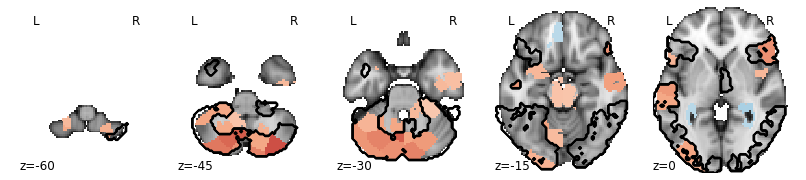

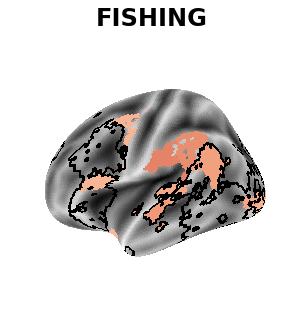

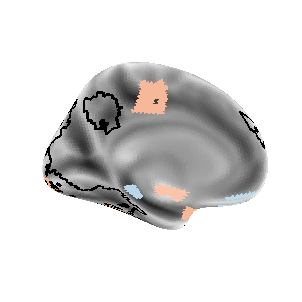

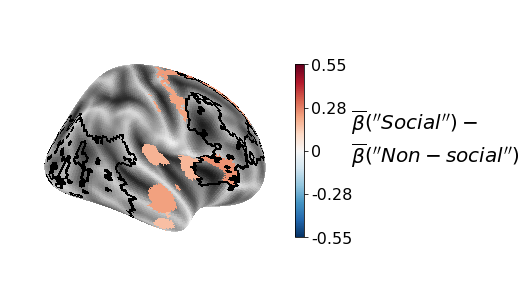

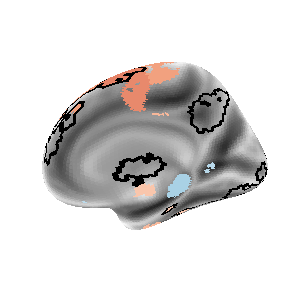

In [90]:
vmin,vmax = -.55,.55
cmap = 'RdBu_r'
#txt = r' $\overline{\beta}(\""")-$' + '\n' + r'$\overline{\beta}_{Non-social}$'+ '\n'
title_txt = 'FISHING'

txt = '  'r"$\overline{\beta}{(''Social'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non-social'')}$"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)

nodes = np.zeros((268,))
nodes[pval_slope_fish_unc] = meanDiff_sl_fish[pval_slope_fish_unc]

img = roi_to_brain(pd.Series(nodes), mask_x)
#coords = [-50,-40,-30,-20,-10,0,10,25,40,50,60] # initial exploration
coords = [-60,-45,-30,-15,0] # initial exploration
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
#ax_plot.title(title_txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot._colorbar_ax.text(1,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
plt.savefig(os.path.join(fig_save_loc,f'FISH/axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#LH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_left)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot1.axes[1].text(4,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
surf_plot1.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_left, texture_contour, figure=surf_plot1, legend=True,levels = [1], colors=['k'])
plt.savefig(os.path.join(fig_save_loc,f'FISH/surf_left_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_left, view = 'medial')#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot2.axes[1].text(4,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#surf_plot2.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
plot_surf_contours(fsaverage.infl_left, texture_contour, figure=surf_plot2, legend=True,levels = [1], colors=['k'])
plt.savefig(os.path.join(fig_save_loc,f'FISH/surf_left_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#RH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
surf_plot3=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot3.axes[1].text(4,.8*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#surf_plot3.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_right, texture_contour, figure=surf_plot3, legend=True,levels = [1], colors=['k'])
surf_plot3.axes[1].text(5,.5*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
plt.savefig(os.path.join(fig_save_loc,f'FISH/surf_right_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

surf_plot4=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=False,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right, view ='medial')#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot4.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
plot_surf_contours(fsaverage.infl_right, texture_contour, figure=surf_plot4, legend=True, levels = [1], colors=['k'])#, labels=['Sig. (q<.05) across\n(a),(c),(d)'])
plt.savefig(os.path.join(fig_save_loc,f'FISH/surf_right_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


In [ ]:
vmax = .55
nodes = np.zeros((268,))
nodes[pval_slope_fish_unc] = meanDiff_sl_fish[pval_slope_fish_unc]
img = roi_to_brain(pd.Series(nodes), mask_x)
#txt = 'FISHING [' + r'$\overline{\beta}_{social}-\overline{\beta}_{nonsocial}$' + ']'
txt = r"$\overline{\beta}(''Social'')-$" + '\n' + r"$\overline{\beta}(''Non-social'')$"
#txt = f"FISHING"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
#img = roi_to_brain(pd.Series(earliest_pt-max(earliest_pt)), mask_x)
fig=plt.figure(1,figsize=((10,3)))
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = True,figure=fig,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True,vmax=vmax)
glassb._colorbar_ax.text(0.9,0.1,txt,fontsize=24,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
glassb.title("FISHING",fontsize=24,bgcolor='k',color='w',fontweight='bold')
#glassb.add_contours(color_rois(pval_slope_fish),linewidths=lw[1], colors=[cols[1]],linestyles='dotted')
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
#glassb.add_contours(color_rois(nodes_coaxbill_rand_all_fish),linewidths=lw[2], colors=[cols[2]],filled=True,linestyle='dashed')
plt.savefig(os.path.join(fig_save_loc,'FISHING.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')


nodes = np.zeros((268,))
nodes[nodes_coaxbill_rand_all] = meanDiff_sl_fish[nodes_coaxbill_rand_all]
img = roi_to_brain(pd.Series(nodes), mask_x)
ax_map = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=10*np.arange(-4,7,2), cmap = 'RdBu_r',vmax=vmax,colorbar=False,annotate=True)
#ax_map.title("FISHING",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'FISHING_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')


In [76]:
min(meanDiff_sl_coaxbill[nodes_coaxbill_rand_all])

0.06498048636519092

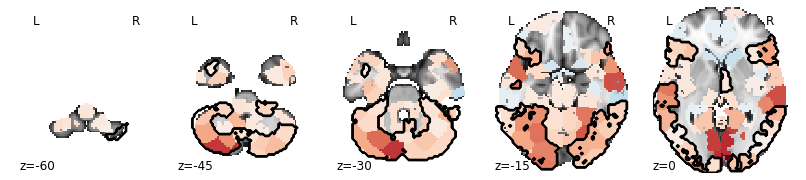

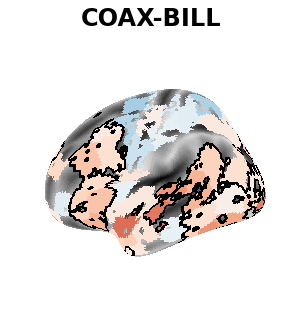

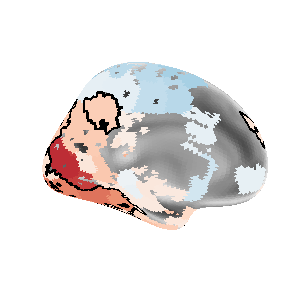

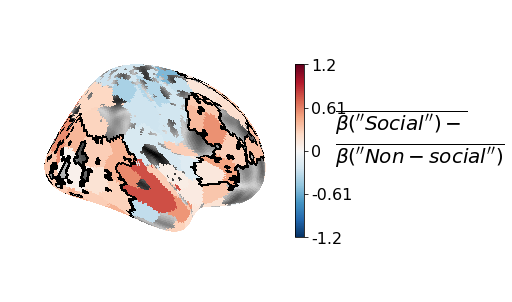

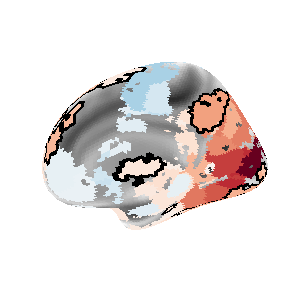

In [98]:
vmin,vmax = -max(meanDiff_sl_coaxbill),max(meanDiff_sl_coaxbill)
cmap = 'RdBu_r'
#txt = r' $\overline{\beta}(\""")-$' + '\n' + r'$\overline{\beta}_{Non-social}$'+ '\n'
title_txt = 'COAX-BILL'
txt = r"$\overline{\beta(''Social'')-}$" + '\n' + r"$\overline{\beta(''Non-social'')}$"
#txt = '  'r"$\overline{\beta}{(''Social'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non-social'')}$"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)

nodes = np.zeros((268,))
nodes[pval_slope_coaxbill_unc] = meanDiff_sl_coaxbill[pval_slope_coaxbill_unc]

img = roi_to_brain(pd.Series(nodes), mask_x)
#coords = [-50,-40,-30,-20,-10,0,10,25,40,50,60] # initial exploration
coords = [-60,-45,-30,-15,0] # initial exploration
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
#ax_plot.title(title_txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot._colorbar_ax.text(1,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
plt.savefig(os.path.join(fig_save_loc,f'COAXBILL/axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#LH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_left)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot1.axes[1].text(4,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
surf_plot1.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_left, texture_contour, figure=surf_plot1, legend=True,levels = [1], colors=['k'])
plt.savefig(os.path.join(fig_save_loc,f'COAXBILL/surf_left_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_left, view = 'medial')#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot2.axes[1].text(4,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#surf_plot2.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
plot_surf_contours(fsaverage.infl_left, texture_contour, figure=surf_plot2, legend=True,levels = [1], colors=['k'])
plt.savefig(os.path.join(fig_save_loc,f'COAXBILL/surf_left_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#RH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
surf_plot3=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot3.axes[1].text(4,.8*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#surf_plot3.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_right, texture_contour, figure=surf_plot3, legend=True,levels = [1], colors=['k'])
surf_plot3.axes[1].text(10,.5*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
plt.savefig(os.path.join(fig_save_loc,f'COAXBILL/surf_right_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

surf_plot4=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=False,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right, view ='medial')#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot4.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
plot_surf_contours(fsaverage.infl_right, texture_contour, figure=surf_plot4, legend=True, levels = [1], colors=['k'])#, labels=['Sig. (q<.05) across\n(a),(c),(d)'])
plt.savefig(os.path.join(fig_save_loc,f'COAXBILL/surf_right_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


In [ ]:
vmin,vmax = -max(meanDiff_sl_coaxbill),max(meanDiff_sl_coaxbill)
print(vmin,vmax)

nodes = np.zeros((268,))
nodes[pval_slope_coaxbill_unc] = meanDiff_sl_coaxbill[pval_slope_coaxbill_unc]
img = roi_to_brain(pd.Series(nodes), mask_x)
#img = roi_to_brain(pd.Series(meanDiff_sl_coaxbill), mask_x)
#txt = 'COAX-BILL [' + r'$\overline{\beta_{social}-{\beta}_{nonsocial}}$' + ']'
#txt = r'$\overline{\beta_{social}-{\beta}_{nonsocial}}$'
txt = r"$\overline{\beta(''Social'')-}$" + '\n' + r"$\overline{\beta(''Non-social'')}$"
#txt = f"COAXBILL"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
#img = roi_to_brain(pd.Series(earliest_pt-max(earliest_pt)), mask_x)
fig=plt.figure(1,figsize=((10,3)))
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = False, vmax= vmax,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
glassb.title("COAX-BILL",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0.2,txt,fontsize=24,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
#glassb.add_contours(color_rois(pval_slope_coaxbill),linewidths=lw[1], colors=[cols[1]],linestyles='dotted')
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyles='solid')

#glassb.add_contours(color_rois(nodes_coaxbill_rand_all_fish),linewidths=lw[2], colors=[cols[2]],filled=True,linestyle='dashed')
#glassb.savefig(os.path.join(fig_save_loc,'COAXBILL.png'),dpi=300)
plt.savefig(os.path.join(fig_save_loc,'COAXBILL.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')


nodes = np.zeros((268,))
nodes[nodes_coaxbill_rand_all] = meanDiff_sl_coaxbill[nodes_coaxbill_rand_all]
img = roi_to_brain(pd.Series(nodes), mask_x)
ax_map = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=10*np.arange(-4,7,2), vmax=vmax, cmap = 'RdBu_r',colorbar=False,annotate=True)
#ax_map.title("COAX-BILL",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'COAXBILL_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')



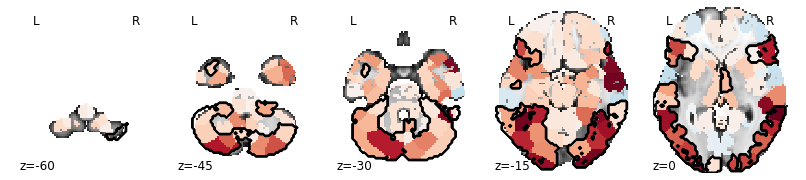

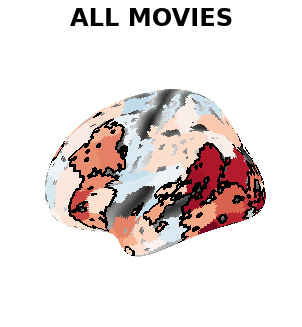

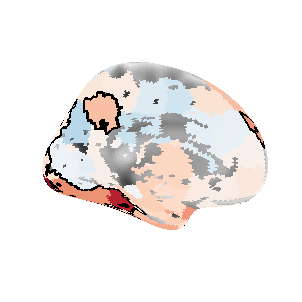

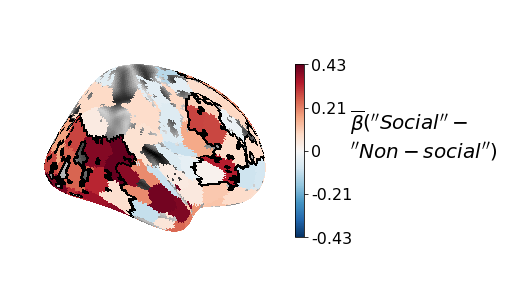

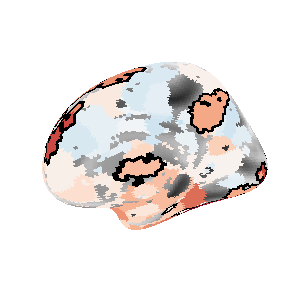

In [93]:
vmin,vmax = -max(meanDiff_sl_all),max(meanDiff_sl_all)
cmap = 'RdBu_r'
#txt = r' $\overline{\beta}(\""")-$' + '\n' + r'$\overline{\beta}_{Non-social}$'+ '\n'
title_txt = 'ALL MOVIES'
txt = r"$\overline{\beta}(''Social''-$" + '\n' + r"$''Non-social'')$"
#txt = '  'r"$\overline{\beta}{(''Social'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non-social'')}$"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)

nodes = np.zeros((268,))
nodes[pval_slope_all_unc] = meanDiff_sl_all[pval_slope_all_unc]

img = roi_to_brain(pd.Series(nodes), mask_x)
#coords = [-50,-40,-30,-20,-10,0,10,25,40,50,60] # initial exploration
coords = [-60,-45,-30,-15,0] # initial exploration
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
#ax_plot.title(title_txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot._colorbar_ax.text(1,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
plt.savefig(os.path.join(fig_save_loc,f'ALL/axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#LH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_left)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot1.axes[1].text(4,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
surf_plot1.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_left, texture_contour, figure=surf_plot1, legend=True,levels = [1], colors=['k'])
plt.savefig(os.path.join(fig_save_loc,f'ALL/surf_left_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_left, view = 'medial')#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot2.axes[1].text(4,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#surf_plot2.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
plot_surf_contours(fsaverage.infl_left, texture_contour, figure=surf_plot2, legend=True,levels = [1], colors=['k'])
plt.savefig(os.path.join(fig_save_loc,f'ALL/surf_left_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#RH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
surf_plot3=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot3.axes[1].text(4,.8*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#surf_plot3.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_right, texture_contour, figure=surf_plot3, legend=True,levels = [1], colors=['k'])
surf_plot3.axes[1].text(5,.5*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
plt.savefig(os.path.join(fig_save_loc,f'ALL/surf_right_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

surf_plot4=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=False,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right, view ='medial')#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot4.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
plot_surf_contours(fsaverage.infl_right, texture_contour, figure=surf_plot4, legend=True, levels = [1], colors=['k'])#, labels=['Sig. (q<.05) across\n(a),(c),(d)'])
plt.savefig(os.path.join(fig_save_loc,f'ALL/surf_right_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 720x216 with 0 Axes>

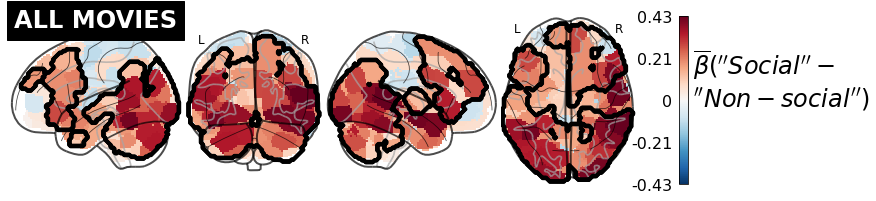

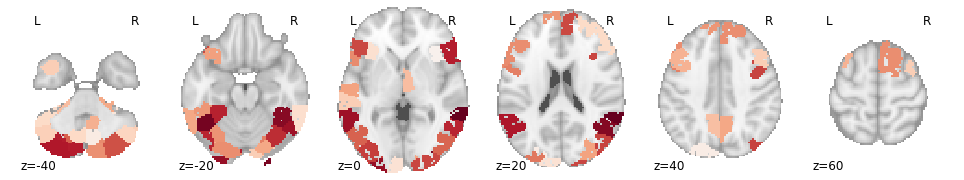

In [91]:
#txt = 'ALL MOVIES'
txt = r"$\overline{\beta}(''Social''-$" + '\n' + r"$''Non-social'')$"
#txt = f"ALL MOVIES"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
#img = roi_to_brain(pd.Series(earliest_pt-max(earliest_pt)), mask_x)
#plt.figure(2,figsize=(6,2))
nodes = np.zeros((268,))
nodes[pval_slope_all_unc] = meanDiff_sl_all[pval_slope_all_unc]
img = roi_to_brain(pd.Series(nodes), mask_x)
#img = roi_to_brain(pd.Series(meanDiff_sl_all), mask_x)

fig=plt.figure(1,figsize=((10,3)))
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = True,#vmax =vmax,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
glassb._colorbar_ax.text(0.9,0.1,txt,fontsize=24,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
glassb.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.tight_layout()
#f.get_children()[0].color = 'g'
#glassb.add_contours(color_rois(pval_slope_all),linewidths=lw[1], colors=[cols[1]],linestyles='dotted')
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
#glassb.add_contours(color_rois(nodes_coaxbill_rand_all_fish),linewidths=lw[2], colors=[cols[2]],filled=True,linestyle='dashed')
#glassb.savefig(os.path.join(fig_save_loc,'ALL.png'),dpi=300)
#fig.set_size_inches(7,3)
plt.savefig(os.path.join(fig_save_loc,'ALL.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')


nodes = np.zeros((268,))
nodes[nodes_coaxbill_rand_all] = meanDiff_sl_all[nodes_coaxbill_rand_all]
img = roi_to_brain(pd.Series(nodes), mask_x)
ax_map = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=10*np.arange(-4,7,2), cmap = 'RdBu_r',#vmax=vmax,
colorbar=False,annotate=True)
#ax_map.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'ALL_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')


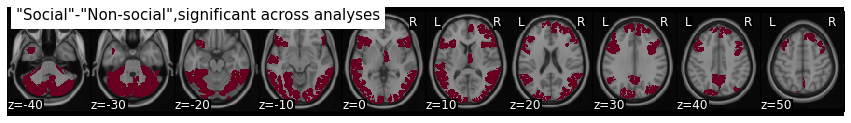

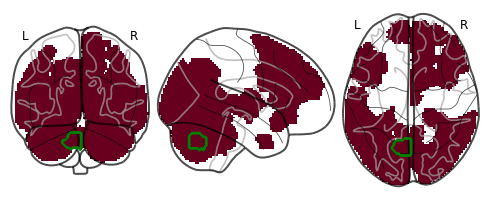

In [49]:
nodes = np.zeros((268,))
nodes[nodes_coaxbill_rand_all] = 1
img = roi_to_brain(pd.Series(nodes), mask_x)
txt = '"Social"-"Non-social",significant across analyses'
img.plot(title = txt,cmap='RdBu_r')
glassb = plot_glass_brain(img.to_nifti(), cmap='RdBu_r')
glassb.add_contours(color_rois(nodes_coaxbill_rand_all_fish),linewidths=1, colors=['g'],linestyle='dotted')



In [463]:
x = [.0005,.03,.02,.1]
fdr_correction(x,.001)

(array([False, False, False, False]), array([0.002, 0.04 , 0.04 , 0.1  ]))

In [483]:
from multipy.fdr import lsu
#from multipy.data import neuhaus

significant_pvals = lsu(np.array(x), q=0.01)
#print(zip(['{:.4f}'.format(p) for p in x], significant_pvals))
significant_pvals

array([ True, False, False, False])

In [469]:
#pip install multipy

  Created wheel for multipy: filename=multipy-0.16-py3-none-any.whl size=41446 sha256=4dc9573fea59dfc5d7c628cc796449d3d4f29294d336c904ded703756c3e30ac
  Stored in directory: /Users/f0053cz/Library/Caches/pip/wheels/44/76/f7/a1ef3c2b183ad6de0116be3f063a3c78c6795248765c62edfc
Successfully built multipy
Note: you may need to restart the kernel to use updated packages.


# Plot timecourses

In [22]:
tr0_ind = 3 # ind at which tr=0 starts
[timepts_indiv_movie,vid_start_rel_tr] = np.load(os.path.join(data_file_loc,'Video_TRs.npy'),allow_pickle=True)
print(vid_start_rel_tr)
l_task = 28

def remove_pretrial_TRs(tcs,vid_start_rel_tr,pretrial_TRs):

    tcs1 = np.empty((tcs.shape[0],tcs.shape[1],28+pretrial_TRs,tcs.shape[3]))
    tcs1[:] = np.nan

    for vid_no in range(10):
        tr0 = vid_start_rel_tr[vid_no]
        tcs1[:,:,:,vid_no] = tcs[:,:,tr0-pretrial_TRs:tr0+28,vid_no] # 31 timepts
    return tcs1
    

#select subs who responded "social" to the yes movie and nonsocial to the no movie

print('\nrun-wise norm data.')
fileName = os.path.join(data_file_loc,'timecourses_run_norm','timecourse-all-movies_zscorenorm.npy') # load fmri data
tcs_run_z = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies
print('before:',tcs_run_z.shape)
tcs_run_z = remove_pretrial_TRs(tcs_run_z,vid_start_rel_tr,tr0_ind)
print('after:',tcs_run_z.shape)

print('\ntrial-wise norm data.')
fileName = os.path.join(data_file_loc,'timecourses_trial_norm','timecourse-all-movies_zscorenorm.npy') # load fmri data
tcs_trial_z = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies
print('before:',tcs_trial_z.shape)
tcs_trial_z = remove_pretrial_TRs(tcs_trial_z,vid_start_rel_tr,tr0_ind)
print('after:',tcs_trial_z.shape)


# collapse across movies and runs (for timecourse plots)

tcs_run_resh_yes = []
tcs_run_resh_no = []
tcs_run_resh_unsure = []
subs_resh_yes = []
subs_resh_no = []
subs_resh_unsure = []
for m in range(0,10):
    tcs_run_resh_yes.append(tcs_run_z[responses[:,m]==1,:,:,m])# subsm * 268 * 31
    tcs_run_resh_no.append(tcs_run_z[responses[:,m]==0,:,:,m])# subsm * 268 * 31
    tcs_run_resh_unsure.append(tcs_run_z[responses[:,m]==9,:,:,m])# subsm * 268 * 31
    subs_resh_yes += list(np.where(responses[:,m]==1)[0])# subsm * 268 * 31, keep track of subject seq
    subs_resh_no  += list(np.where(responses[:,m]==0)[0])# subsm * 268 * 31
    subs_resh_unsure  += list(np.where(responses[:,m]==9)[0])# subsm * 268 * 31
tcs_run_resh_yes = np.concatenate(tcs_run_resh_yes,axis=0)
tcs_run_resh_no  = np.concatenate(tcs_run_resh_no,axis=0)
tcs_run_resh_unsure  = np.concatenate(tcs_run_resh_unsure,axis=0)
print('Across all movies: \nyes:'+ str(tcs_run_resh_yes.shape) + ',\nno:' + str(tcs_run_resh_no.shape) + ',\nunsure:' + str(tcs_run_resh_unsure.shape))

#np.concatenate((movieTC_yes,movieTC_no),axis=0).shape

[7 14 14 14 14 7 14 14 14 14]

run-wise norm data.
before: (1048, 268, 56, 10)
after: (1048, 268, 31, 10)

trial-wise norm data.
before: (1048, 268, 56, 10)
after: (1048, 268, 31, 10)
Across all movies: 
yes:(4905, 268, 31),
no:(4294, 268, 31),
unsure:(636, 268, 31)


In [30]:
TR = .72

# get the right red/blue shades
#red_rgb = [103,0,31] # edges of RdBu
#blue_rgb = [5,48,97] # edges of RdBu
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255

alpha = .2 # transparency inside boxplots, for datapts etc.

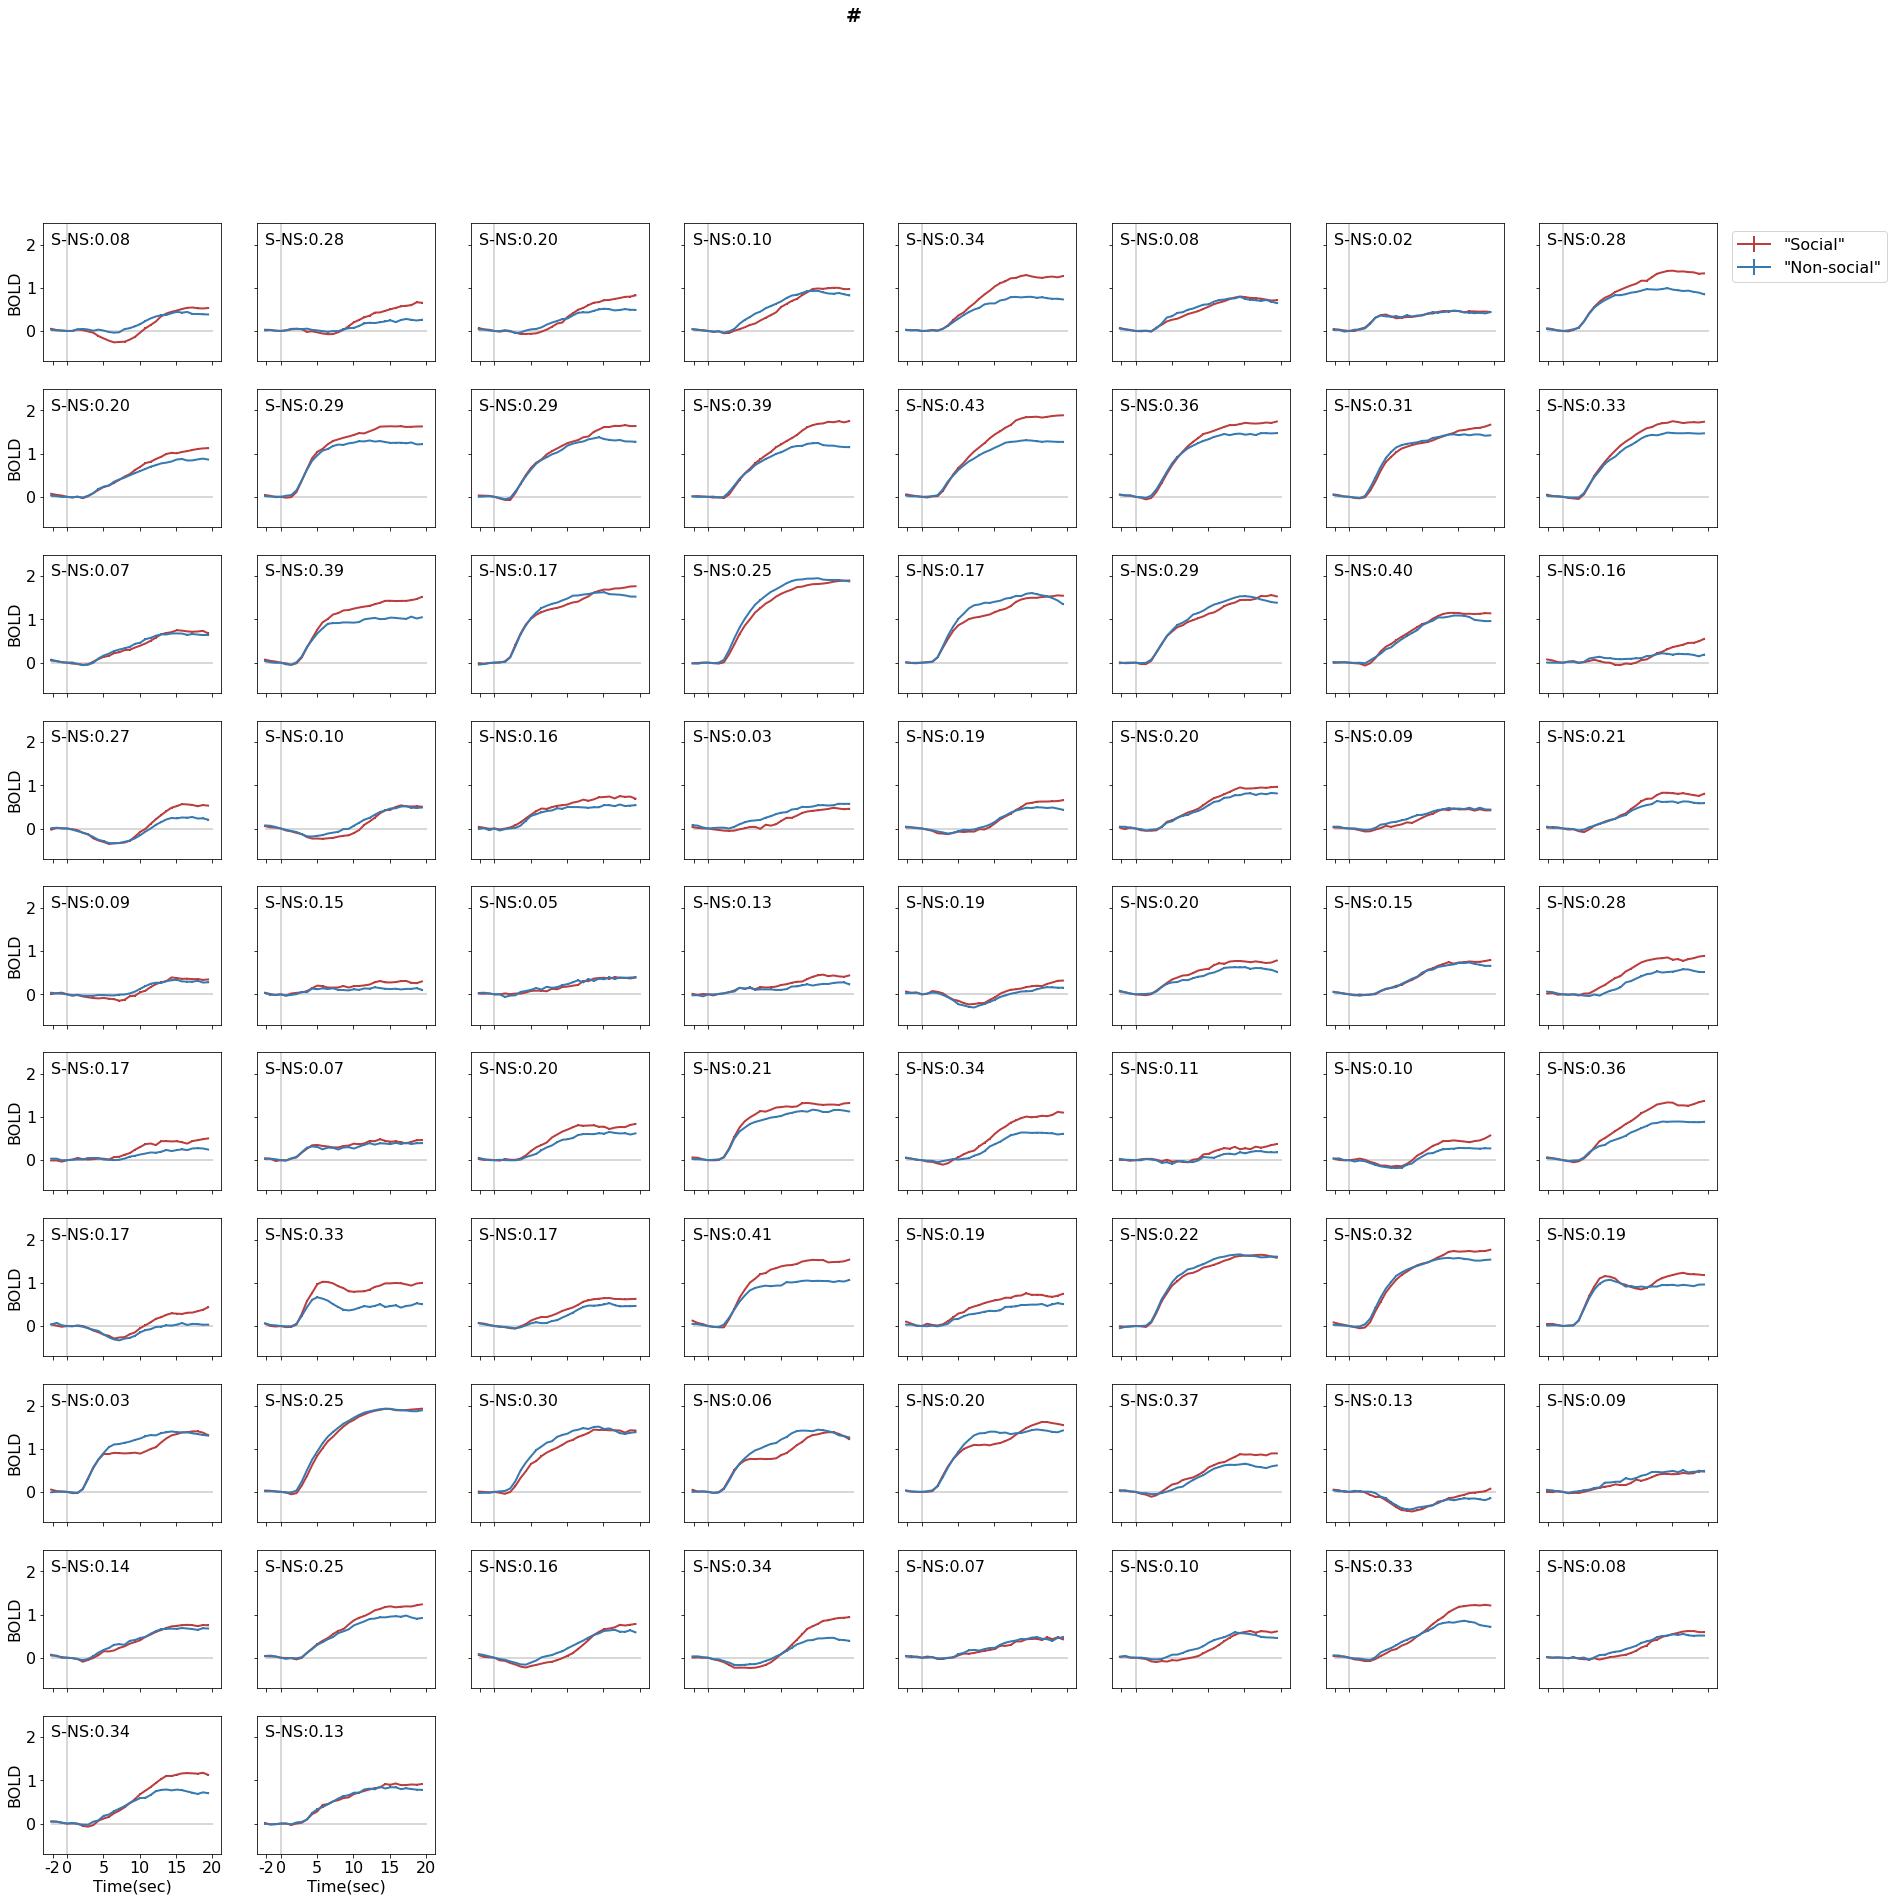

In [38]:
plot_type = 'all' # CHANGE WHAT TO PLOT HERE!! 'rand', 'all','coax-bill' or 'fish'

[ymin,ymax] = [-.7,2.5]
xlbls = [-2,0,5,10,15,20]
x_ticks = [(i/TR)+tr0_ind for i in xlbls]
xlbls = [str(i) for i in xlbls]

nrows = 10
nodes = np.where(nodes_coaxbill_rand_all)[0]
ncols = int(np.ceil(len(nodes)/nrows))
#line_loc = []
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, sharex=True, sharey=True, figsize = (30,30)) # figsize = (20,15))

plt.suptitle('#', fontweight='bold')    

for i,n in enumerate(nodes): #for i,n in enumerate(df['Nodes']):
    #fig, ax = plt.figure(i+1,figsize=(10,5))   

    if ncols == 1:
        ax1 = ax[i]
    else:
        r = int(np.floor(i/ncols))
        c = int(i % ncols)
        ax1 = ax[r,c]

    if plot_type == 'rand':
        movieTC_yes = tcs_run_z[responses[:,4]==1,n,:,4] # nsubs * ntimepts
        movieTC_no  = tcs_run_z[responses[:,4]==0,n,:,4] # nsubs * ntimepts
        #movieTC_unsure = tcs_run_z[responses[:,4]==9,n,:,4] # nsubs * ntimepts
        #movie_yes_or_no = tcs_run_z[(responses[:,4]==1)|(responses[:,4]==0),n,:,4]
    elif plot_type == 'all':
        movieTC_yes = tcs_run_resh_yes[:,n,:]
        movieTC_no  = tcs_run_resh_no[:,n,:]
        #movieTC_unsure  = tcs_run_resh_unsure[:,n,:] 
    elif plot_type == 'coax-bill':
        movieTC_yes = tcs_trial_z[(responses[:,0]==1) & (responses[:,1]==0),n,:,0] # nsubs * ntimepts
        movieTC_no  = tcs_trial_z[(responses[:,0]==1) & (responses[:,1]==0),n,:,1] # nsubs * ntimepts
        #movieTC_unsure = tcs_run_z[responses[:,4]==9,n,:,4] # nsubs * ntimepts
        #movie_yes_or_no = tcs_run_z[(responses[:,4]==1)|(responses[:,4]==0),n,:,4]
    
     
    #  
    ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmedian(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
    #ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmedian(movie_yes_or_no,axis=0),stats.sem(movie_yes_or_no,axis=0,nan_policy='omit'),color = 'k',linewidth=2,label ='"Social"/"Non-social"')
    #ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmedian(movieTC_unsure,axis=0),stats.sem(movieTC_unsure,axis=0,nan_policy='omit'),color = 'orange',linewidth=2,label ='"Unsure"')
    ax1.vlines(tr0_ind,ymin,ymax,color=[.8,.8,.8])
    ax1.hlines(0,0,31,color=[.8,.8,.8])
    ax1.set_ylim(ymin,ymax)
    if plot_type == 'rand':
        ax1.text(0,.8*ymax,f'S-NS:{meanDiff_sl_rand[n]:.2f}')
    elif plot_type == 'all':
        ax1.text(0,.8*ymax,f'S-NS:{meanDiff_sl_all[n]:.2f}')
    elif plot_type == 'coax-bill':
        ax1.text(0,.8*ymax,f'S-NS:{meanDiff_sl_coaxbill[n]:.2f}')

    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels(xlbls)
    #ax[r,0].set_ylabel('BOLD\n(a.u.)')
    #txt = '\n'.join(eval(shen268_lbl[str(n+1)][0])['name'].split(';'))
    #ax1.text(35,0,txt)
    if i %ncols==0:
        ax1.set_ylabel('BOLD')# activity (run-nomralized)')
    if r == nrows-1:
        ax1.set_xlabel('Time(sec)')
    if (r==0) & (c==ncols-1):
        ax1.legend(bbox_to_anchor = [2,1])

if ncols > 1:
    for i in range(int(nrows*ncols-len(nodes))):
        ax[r,c+1+i].axis('off')
#plt.tight_layout()

In [34]:
coef_slope_rand.shape

(1048, 268)